In [1]:
import pandas as pd
import seaborn as sns
import lux
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statistics
import math
import scipy.stats as stats

In [2]:
df = pd.read_excel("Dataset.xlsx")

In [3]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [6]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [7]:
df = df.drop(columns = ['StandardHours', 'Over18'])

In [8]:
mask = df['Attrition'] == "Yes"
dfYes = df[mask]

In [9]:
dfYes.default_display = "lux"

In [10]:
dfYes.save_as_html('Yes.html')

Saved HTML to Yes.html


In [11]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

C:\Users\2104636406\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [12]:
obj_df = pd.get_dummies(obj_df).drop(columns=['Attrition_No', 'OverTime_No', 'Gender_Female'])

In [13]:
dfBase = df.drop(columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']).join(obj_df, how='left')

In [14]:
dfBase

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
dfBase.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
df_X = dfBase.drop(['Attrition_Yes'], axis=1)
df_X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [17]:
var_independentes = df_X.columns
var_independentes

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'J

In [18]:
y_var = 'Attrition_Yes'
x_var = var_independentes

In [19]:

y = dfBase[y_var]
x = dfBase[x_var]

x = sm.add_constant(x) # adicionar o intercepto

model_sm = sm.OLS(y,x.astype(float)).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     10.99
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.94e-64
Time:                        20:10:39   Log-Likelihood:                -396.14
No. Observations:                1470   AIC:                             884.3
Df Residuals:                    1424   BIC:                             1128.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0035      0.001     -2.640      0.008      -0.006      -0.001
DailyRate                         -2.698e-05   2.12e-05     -1.272      0.203   -6.86e-05    1.46e-05
DistanceFromHome                      0.0036      0.001      3.457      0.001       0.002       0.006
Education                             0.0019      0.009      0.223      0.823      -0.015       0.019
EmployeeCount                         0.3335      0.057      5.804      0.000       0.221       0.446
EmployeeNumber                    -7.553e-06   1.42e-05     -0.532      0.595   -3.54e-05    2.03e-05
EnvironmentSatisfaction              -0.0404      0.008     -5.179      0.000      -0.056      -0.025
HourlyRate                           -0.0002      0.000     -0.403      0.687      -0.001       0.001
JobInvolvement                       -0.0580      0.012     -4.836      0.000      -0.082      -0.034
JobLevel                             -0.0054      0.029     -0.190      0.850      -0.061       0.051
JobSatisfaction                      -0.0373      0.008     -4.839      0.000      -0.052      -0.022
MonthlyIncome                       1.46e-06    7.6e-06      0.192      0.848   -1.34e-05    1.64e-05
MonthlyRate                        4.697e-07   1.19e-06      0.394      0.694   -1.87e-06    2.81e-06
NumCompaniesWorked                    0.0172      0.004      4.519      0.000       0.010       0.025
PercentSalaryHike                    -0.0022      0.004     -0.594      0.553      -0.009       0.005
PerformanceRating                     0.0183      0.037      0.491      0.623      -0.055       0.091
RelationshipSatisfaction             -0.0233      0.008     -2.953      0.003      -0.039      -0.008
StockOptionLevel                     -0.0165      0.014     -1.210      0.226      -0.043       0.010
TotalWorkingYears                    -0.0037      0.002     -1.537      0.124      -0.008       0.001
TrainingTimesLastYear                -0.0134      0.007     -2.021      0.043      -0.026      -0.000
WorkLifeBalance                      -0.0314      0.012     -2.601      0.009      -0.055      -0.008
YearsAtCompany                        0.0055      0.003      1.840      0.066      -0.000       0.011
YearsInCurrentRole                   -0.0092      0.004     -2.378      0.018      -0.017      -0.002
YearsSinceLastPromotion               0.0108      0.003      3.164      0.002       0.004       0.018
YearsWithCurrManager                 -0.0096      0.004     -2.408      0.016      -0.017      -0.002
BusinessTravel_Non-Travel             0.0385      0.028      1.401      0.162      -0.015       0.092
BusinessTravel_Travel_Frequently      0.1909      0.025      7.503      0.000       0.141       0.241
BusinessTravel_Travel_R

In [25]:
#dfBase.corr().style.background_gradient(cmap='coolwarm')

In [21]:
variaveis_modelo = 'MonthlyIncome + Education + EducationField_Other + JobRole_Manager  + 1'

# obtendo y e x´s baseado nessa regressao
y_modelo, x_modelo = dmatrices('Attrition_Yes ~' + variaveis_modelo , dfBase, return_type='dataframe' )

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_modelo.values, i) for i in range(x_modelo.shape[1])]
vif["Variáveis Independentes"] = x_modelo.columns
vif.sort_values(by='VIF Factor').reset_index(drop=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
formula = 'Attrition_Yes ~ MonthlyIncome + Education + EducationField_Other + JobRole_Manager  + 1'
modelo = smf.ols(formula=formula, data=dfBase).fit() 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     10.02
Date:                Sun, 09 May 2021   Prob (F-statistic):           5.31e-08
Time:                        20:10:41   Log-Likelihood:                -595.43
No. Observations:                1470   AIC:                             1201.
Df Residuals:                    1465   BIC:                             1227.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2646 

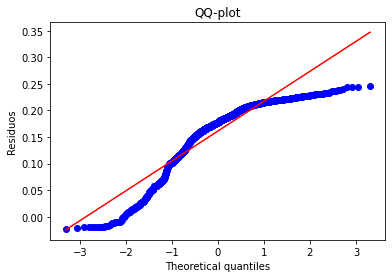

In [23]:
fig = plt.figure()
res = stats.probplot(modelo.predict(), plot=plt)
plt.ylabel('Residuos')
plt.title('QQ-plot')
plt.show()

In [24]:
#teste de homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)
names = ['Lagrange multiplier statistic', 'p-value' , 'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 42.76308355856781),
 ('p-value', 1.1587890716502224e-08),
 ('f-value', 10.97363666319385),
 ('f p-value', 9.05525001908371e-09)]